
# Importing Libraries

In [251]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy import stats
from sklearn.linear_model import LinearRegression

from sklearn import preprocessing as pp                      # *data pre-processing* using sklearn
from sklearn.model_selection import train_test_split                              
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score    # metrics evaluation

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split



# metrics evaluation
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline


!pip install imblearn
import imblearn
from imblearn.under_sampling import RandomUnderSampler

from imblearn.under_sampling import TomekLinks, ClusterCentroids


# Loading The Data

In [343]:
ddf = pd.read_csv('day.csv')
hdf_raw = pd.read_csv('hour.csv', index_col = 0)


# Preprocessing


In [344]:
#Hot encoding the holiday variable
hdf_raw.loc[hdf_raw['holiday'] == 0, 'is_holiday'] = 'No'
hdf_raw.loc[hdf_raw['holiday'] == 1, 'is_holiday'] = 'Yes'

#Labeling the seasons
hdf_raw.loc[hdf_raw['season'] == 1, 'season'] = 'Winter'
hdf_raw.loc[hdf_raw['season'] == 2, 'season'] = 'Spring'
hdf_raw.loc[hdf_raw['season'] == 3, 'season'] = 'Summer'
hdf_raw.loc[hdf_raw['season'] == 4, 'season'] = 'Fall'

#Renaming the columns
hdf = hdf_raw.rename(columns={"hr": "hour", "cnt": "total_count", "hum": "humidity", "dteday": "date", "yr": "year", "mnth": "month",   }) 

#standartising the temperature
#hdf.temp = hdf.temp*47 - 8
#hdf.loc[hdf['temp'] <= 0, 'tmp_lvl']  = 'cold'
#hdf.loc[((hdf['temp'] > 0) & (hdf['temp'] <= 10) ), 'tmp_lvl']  = 'low'
#hdf.loc[(( hdf['temp'] > 10) & (hdf['temp'] <= 20)), 'tmp_lvl']  = 'medium'
#hdf.loc[((hdf['temp'] > 20) & (hdf['temp'] <= 30)), 'tmp_lvl']  = 'warm'
#hdf.loc[hdf['temp'] > 30, 'tmp_lvl']  = 'hot'

#converting the date
hdf.date = pd.to_datetime(hdf.date)


In [345]:
hdf.dtypes

date           datetime64[ns]
season                 object
year                    int64
month                   int64
hour                    int64
holiday                 int64
weekday                 int64
workingday              int64
weathersit              int64
temp                  float64
atemp                 float64
humidity              float64
windspeed             float64
casual                  int64
registered              int64
total_count             int64
is_holiday             object
dtype: object

In [347]:
#Converting data types to categories 
hdf['year'] = hdf['year'].astype('category')
hdf['season'] = hdf['season'].astype('category')
hdf['month'] = hdf['month'].astype('category')

hdf['is_holiday'] = hdf['is_holiday'].astype('category')
hdf['weekday'] = hdf['weekday'].astype('category')
hdf['workingday'] = hdf['workingday'].astype('category')
hdf['weathersit'] = hdf['weathersit'].astype('category')

#creating dummies
#hdf = pd.get_dummies(hdf, columns=['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
#       'weathersit', 'is_holiday', 'tmp_lvl'])

hdf = pd.get_dummies(hdf, columns=['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'is_holiday'])


# check! hour

In [348]:
hdf

,date,hour,temp,atemp,humidity,windspeed,casual,registered,total_count,season_Fall,...,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4,is_holiday_No,is_holiday_Yes
instant,,,,,,,,,,,,,,,,,,,,,
1,2011-01-01,0,0.24,0.2879,0.81,0.0000,3,13,16,0,...,0,1,1,0,1,0,0,0,1,0
2,2011-01-01,1,0.22,0.2727,0.80,0.0000,8,32,40,0,...,0,1,1,0,1,0,0,0,1,0
3,2011-01-01,2,0.22,0.2727,0.80,0.0000,5,27,32,0,...,0,1,1,0,1,0,0,0,1,0
4,2011-01-01,3,0.24,0.2879,0.75,0.0000,3,10,13,0,...,0,1,1,0,1,0,0,0,1,0
5,2011-01-01,4,0.24,0.2879,0.75,0.0000,0,1,1,0,...,0,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,19,0.26,0.2576,0.60,0.1642,11,108,119,0,...,0,0,0,1,0,1,0,0,1,0
17376,2012-12-31,20,0.26,0.2576,0.60,0.1642,8,81,89,0,...,0,0,0,1,0,1,0,0,1,0
17377,2012-12-31,21,0.26,0.2576,0.60,0.1642,7,83,90,0,...,0,0,0,1,1,0,0,0,1,0


In [349]:
hdf.dtypes



date              datetime64[ns]
hour                       int64
temp                     float64
atemp                    float64
humidity                 float64
windspeed                float64
casual                     int64
registered                 int64
total_count                int64
season_Fall                uint8
season_Spring              uint8
season_Summer              uint8
season_Winter              uint8
year_0                     uint8
year_1                     uint8
month_1                    uint8
month_2                    uint8
month_3                    uint8
month_4                    uint8
month_5                    uint8
month_6                    uint8
month_7                    uint8
month_8                    uint8
month_9                    uint8
month_10                   uint8
month_11                   uint8
month_12                   uint8
holiday_0                  uint8
holiday_1                  uint8
weekday_0                  uint8
weekday_1 

# Fitting The Model


In [350]:
#hdf = hdf.drop(columns = [ 'date', 'registered', 'casual', 'temp', 'atemp', 'year_0', 'year_1'])

hdf = hdf.drop(columns = [ 'date', 'registered', 'casual', 'temp', 'atemp', 'year_0', 'year_1'])


In [351]:
X = hdf.drop(columns = ['total_count'])
y = hdf.total_count

In [352]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

In [353]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [354]:
# Define the scaler
ss = StandardScaler().fit(X_train)
# Scale the train set
X_train = ss.transform(X_train)
# Scale the test set
X_test = ss.transform(X_test)

# Linear regression

In [355]:
from sklearn import linear_model

lin_reg = linear_model.LinearRegression()

In [356]:
lin_reg

LinearRegression()

In [357]:
lin_reg.fit(X_train,y_train)


LinearRegression()

In [358]:
X_train.shape

(13903, 36)

In [359]:
X_test.shape

(3476, 36)

In [360]:
y_pred = lin_reg.predict(X_test)

In [361]:
lin_reg.score(X_train,y_train)

0.3131889631620267

In [362]:

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

110.38534293299095

In [363]:
y_test.max()

977

In [364]:
y_test[0:10]

instant
12831    425
8689      88
7092       4
12231    526
432       13
1087      32
11606    706
7984      26
10392      2
7047      21
Name: total_count, dtype: int64

In [365]:
y_pred[0:10]

array([391.19590522, 186.55133197, 159.28965522, 336.78965522,
         8.53965522, -22.08534478, 304.82090522,  66.72715522,
        36.22715522, 172.72715522])

# Predictive Modelling - Decision Tree Regression, KNN Regression ...

In [366]:
bks_dt_feature_names = list(hdf.columns)

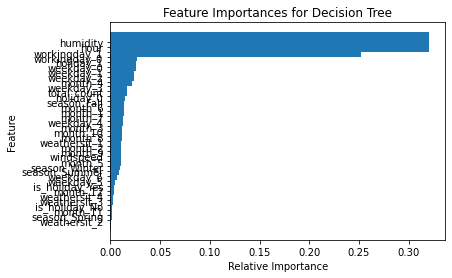

In [367]:
bks_dt_feature_importances = bks_dt.feature_importances_
bks_dt_feature_names, bks_dt_feature_scores = zip(*sorted(zip(bks_dt_feature_names,
bks_dt_feature_importances), key=lambda x: x[1]))
y_position = list(range(len(bks_dt_feature_names)))
plt.barh(y_position, bks_dt_feature_scores, height=3.9, align='center')
plt.yticks(y_position , bks_dt_feature_names)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree')

In [368]:
hdf


,hour,humidity,windspeed,total_count,season_Fall,season_Spring,season_Summer,season_Winter,month_1,month_2,...,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4,is_holiday_No,is_holiday_Yes
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0.81,0.0000,16,0,0,0,1,1,0,...,0,1,1,0,1,0,0,0,1,0
2,1,0.80,0.0000,40,0,0,0,1,1,0,...,0,1,1,0,1,0,0,0,1,0
3,2,0.80,0.0000,32,0,0,0,1,1,0,...,0,1,1,0,1,0,0,0,1,0
4,3,0.75,0.0000,13,0,0,0,1,1,0,...,0,1,1,0,1,0,0,0,1,0
5,4,0.75,0.0000,1,0,0,0,1,1,0,...,0,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,19,0.60,0.1642,119,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
17376,20,0.60,0.1642,89,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
17377,21,0.60,0.1642,90,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0


In [369]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler

In [370]:
test_pred[test_pred < 0] = 0


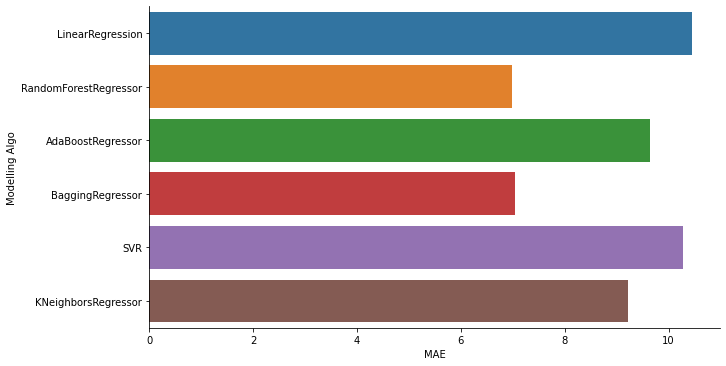

In [371]:
models=[LinearRegression(),RandomForestRegressor(max_features= 'auto', n_estimators= 100, n_jobs= -1),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['LinearRegression', 'RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
rmse = []
mae = []
d1= {}
d2 = {}
d3 = {}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    test_pred=clf.predict(X_test)
    
    #print(mean_squared_log_error(test_pred,y_test))
    
    test_pred[test_pred < 0] = 0
    
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
    
    
    rmse.append(np.sqrt(mean_squared_error(test_pred,y_test, squared=False)))
    
    mae.append(np.sqrt(mean_absolute_error(test_pred,y_test )))
    

d1={'Modelling Algo':model_names,'RMSLE':rmsle}

d2={'Modelling Algo':model_names,'RMSE':rmse}

d3={'Modelling Algo':model_names,'MAE':mae}

rmsle_frame=pd.DataFrame(d1)
#rmsle_frame

rmse_frame=pd.DataFrame(d2)
#rmse_frame

mae_frame=pd.DataFrame(d3)
#mae_frame

sns.catplot(y='Modelling Algo',x='MAE',data=mae_frame,kind='bar',height=5,aspect=2);

In [372]:
d3

{'Modelling Algo': ['LinearRegression',
  'RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'MAE': [10.46075203051428,
  6.990264722357313,
  9.645116901887645,
  7.041310228128872,
  10.285237029847668,
  9.223328730201612]}

In [342]:
d3

{'Modelling Algo': ['LinearRegression',
  'RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'MAE': [10.264473414512365,
  6.619413595106994,
  9.481189170164633,
  6.750834195078613,
  10.183314562353948,
  9.321063294689793]}

In [282]:
y_test.min()

1

In [283]:
y_test.max()

977

In [284]:
hdf


,humidity,windspeed,total_count,season_Fall,season_Spring,season_Summer,season_Winter,month_1,month_2,month_3,...,weathersit_2,weathersit_3,weathersit_4,is_holiday_No,is_holiday_Yes,tmp_lvl_cold,tmp_lvl_hot,tmp_lvl_low,tmp_lvl_medium,tmp_lvl_warm
instant,,,,,,,,,,,,,,,,,,,,,
1,0.81,0.0000,16,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0.80,0.0000,40,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0.80,0.0000,32,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0.75,0.0000,13,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0.75,0.0000,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,0.60,0.1642,119,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
17376,0.60,0.1642,89,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
17377,0.60,0.1642,90,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [285]:
from sklearn.ensemble import RandomForestRegressor

In [286]:
# create a regressor object
rfregressor = RandomForestRegressor(random_state = 0)

# fit the regressor with X and Y data
rfregressor.fit(X, y)

RandomForestRegressor(random_state=0)

In [287]:
rfregressor

RandomForestRegressor(random_state=0)

In [288]:
# Comparing predicted values with true values in testing set

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

114.32633586294682

In [289]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
melb_preds = forest_model.predict(X_test)
print(mean_absolute_error(y_test, melb_preds))

101.5713270861081


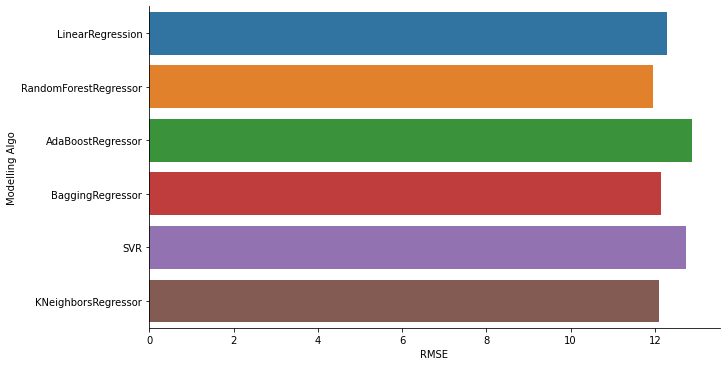

In [290]:
sns.catplot(y='Modelling Algo',x='RMSE',data=rmse_frame,kind='bar',height=5,aspect=2);

In [291]:
y_pred[y_pred < 0] = 0
mean_absolute_error(y_test, y_pred)

113.77613122280667

In [292]:
y_pred[y_pred < 0] = 0
mean_squared_log_error(y_test, y_pred)

2.1235627801171906

In [375]:
y_test.min()

1

In [376]:
6/977

0.006141248720573183

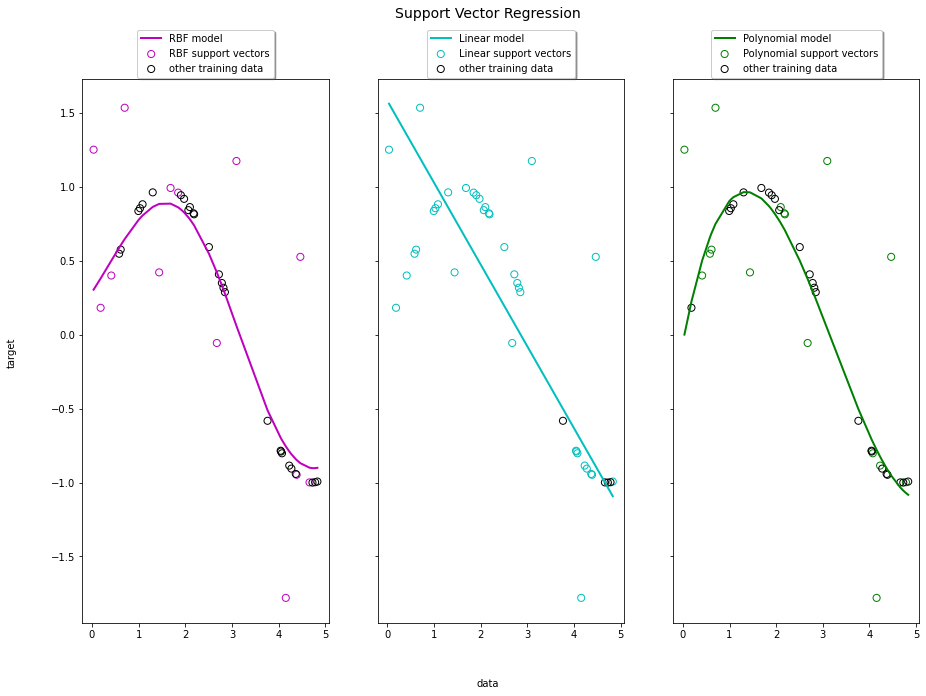

In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()